Introduction to Python Notebooks vs 1.3

// the idea of this script 'joe' is to introduce the basic metaphors for a novice to Python and Jupyter
// it then goes on to explore some of the commonly used packages such as Pandas, Sci-Kit Learn and Numpy for data processing, statistical model building, comparison and  evaluation
// we will explore some of the Visualisation packages such as Matplotlib and Seaborn
// Finally we take a look at sharing and operationalising the value of Python


In [1]:
name='joe'

In [2]:
name

'joe'

In [3]:
%matplotlib inline

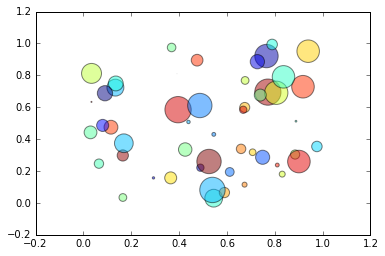

In [4]:
import numpy as np
import matplotlib.pyplot as plt


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

"""
Shows how to combine Normalization and Colormap instances to draw
"levels" in pcolor, pcolormesh and imshow type plots in a similar
way to the levels keyword argument to contour/contourf.

"""

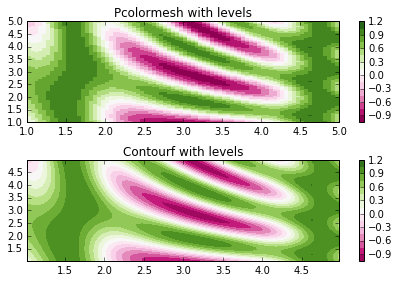

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('Pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('Contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

In [6]:
%%timeit
square_evens = [n*n for n in range(1000)]

10000 loops, best of 3: 53 µs per loop


In [7]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/cHZONQ2-x7I" frameborder="0" allowfullscreen></iframe>

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.DataFrame(np.random.randn(10,5))
df.head()

,0,1,2,3,4
0,0.489216,0.519912,-1.676635,-1.678559,-0.685712
1,-0.414138,-0.067074,1.537039,0.330897,-1.383302
2,-0.107257,-0.094681,1.315046,-0.159487,0.543452
3,-1.693474,-0.256428,0.409298,0.068094,-0.388703
4,-0.567714,1.067893,-0.988754,1.217608,0.141100


Introducing 'Iris' -  with some pretty flower graphs

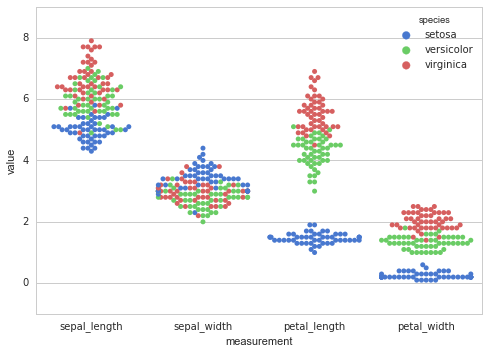

In [10]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species", data=iris)


Pandas and Ski-Kit Learn for Classification models


// Using the Adult Census 94 dataset

// Design Pattern - build best predictive model for targetting whether an individual earns above $50,000 per annum



In [11]:
import pandas as pd
dta = pd.read_csv("C:/Users/iasharp/Desktop/Demos/depy-master/data/adult.data.cleaned.csv.gz", compression="gzip")
test = pd.read_csv("C:/Users/iasharp/Desktop/Demos/depy-master/data/adult.test.cleaned.csv.gz", compression="gzip")


In [12]:
dta.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Data Exploration

// Data Validation, Summary Statistics and Basic Visualisations

In [13]:
dta.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


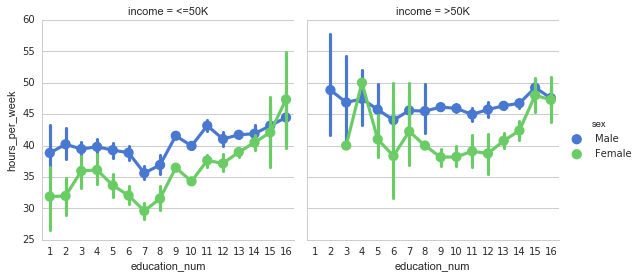

In [14]:
import seaborn as sns
sns.factorplot("education_num", "hours_per_week", hue="sex", col="income", data=dta)

##Pandas Orientation

In [15]:
dta.index

RangeIndex(start=0, stop=32561, step=1)

In [16]:
dta.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education_num',
       u'marital_status', u'occupation', u'relationship', u'race', u'sex',
       u'capital_gain', u'capital_loss', u'hours_per_week', u'native_country',
       u'income'],
      dtype='object')

In [17]:
dta.columns.difference(test.columns)

Index([], dtype='object')

In [18]:
dta.columns.equals(test.columns)

True

Indexing in Pandas

In [19]:
dta.ix[[5, 10, 15]]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K


In [20]:
dta[["workclass", "education"]]

,workclass,education
0,State-gov,Bachelors
1,Self-emp-not-inc,Bachelors
2,Private,HS-grad
3,Private,11th
4,Private,Bachelors
5,Private,Masters
6,Private,9th
7,Self-emp-not-inc,HS-grad
8,Private,Masters
9,Private,Bachelors


In [21]:
type(dta[["workclass"]])

pandas.core.frame.DataFrame

In [22]:
type(dta["workclass"])

pandas.core.series.Series

Rows and Columns

In [23]:
dta.ix[[5, 10, 15], ["workclass", "education"]]

,workclass,education
5,Private,Masters
10,Private,Some-college
15,Private,7th-8th


IMPORTANT - INSERT CELLS 170- 181 // Pandas Preprocessing

dta.head()

In [24]:
dta.groupby("income").education.describe()

income        
<=50K   count         24720
        unique           16
        top         HS-grad
        freq           8826
>50K    count          7841
        unique           15
        top       Bachelors
        freq           2221
Name: education, dtype: object

In [25]:
dta.income

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
5        <=50K
6        <=50K
7         >50K
8         >50K
9         >50K
10        >50K
11        >50K
12       <=50K
13       <=50K
14        >50K
15       <=50K
16       <=50K
17       <=50K
18       <=50K
19        >50K
20        >50K
21       <=50K
22       <=50K
23       <=50K
24       <=50K
25        >50K
26       <=50K
27        >50K
28       <=50K
29       <=50K
         ...  
32531    <=50K
32532     >50K
32533     >50K
32534    <=50K
32535    <=50K
32536     >50K
32537    <=50K
32538     >50K
32539     >50K
32540    <=50K
32541    <=50K
32542    <=50K
32543    <=50K
32544    <=50K
32545     >50K
32546    <=50K
32547    <=50K
32548    <=50K
32549    <=50K
32550    <=50K
32551    <=50K
32552    <=50K
32553    <=50K
32554     >50K
32555    <=50K
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income, dtype: object

Scikit-Learn API
Base object is the estimator
Any object that learns from data
Classification, regression, clustering, or transformer
parameters passed to estimator
    estimator = Estimator(*args, **kwargs)
fit method provided
    estimator.fit(X, y)
Computed parameters have an underscore appended
    estimator.coef_
Preparing the Data

Reported Benchmarks
|    Algorithm               Error
| -- ----------------        -----
| 1  C4.5                    15.54
| 2  C4.5-auto               14.46
| 3  C4.5 rules              14.94
| 4  Voted ID3 (0.6)         15.64
| 5  Voted ID3 (0.8)         16.47
| 6  T2                      16.84
| 7  1R                      19.54
| 8  NBTree                  14.10
| 9  CN2                     16.00
| 10 HOODG                   14.82
| 11 FSS Naive Bayes         14.05
| 12 IDTM (Decision table)   14.46
| 13 Naive-Bayes             16.12
| 14 Nearest-neighbor (1)    21.42
| 15 Nearest-neighbor (3)    20.35
| 16 OC1                     15.04

In [26]:
dta.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Deleting Columns

In [28]:
del dta["education"]
del dta["fnlwgt"]
del test["education"]
del test["fnlwgt"]

Advanced Indexing

In [29]:
dta.education_num <= 8

0        False
1        False
2        False
3         True
4        False
5        False
6         True
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15        True
16       False
17       False
18        True
19       False
20       False
21       False
22        True
23        True
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
32531    False
32532    False
32533    False
32534    False
32535     True
32536    False
32537    False
32538    False
32539    False
32540    False
32541    False
32542    False
32543    False
32544    False
32545    False
32546    False
32547    False
32548    False
32549    False
32550    False
32551     True
32552    False
32553    False
32554    False
32555    False
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education_num, dtype: bool

In [141]:
dta.ix[dta.education_num <= 8, "education_num"]

3        7
6        5
15       4
18       7
22       5
23       7
35       7
40       5
56       3
61       4
77       6
78       7
79       4
88       5
106      6
107      7
115      5
148      7
160      2
168      7
183      4
195      3
205      7
209      7
214      4
219      6
221      2
224      1
226      6
230      7
        ..
32401    4
32403    2
32405    7
32413    3
32423    7
32425    2
32430    4
32431    4
32432    1
32447    6
32448    4
32450    5
32456    7
32467    5
32476    8
32477    8
32479    4
32490    5
32493    7
32496    7
32500    7
32501    5
32505    6
32508    6
32515    6
32517    4
32522    7
32526    6
32535    8
32551    6
Name: education_num, dtype: int64

Categorical Data

In [142]:
cat = pd.Categorical(dta.workclass)
cat.describe()

,counts,freqs
categories,,
?,1836,0.056386
Federal-gov,960,0.029483
Local-gov,2093,0.064279
Never-worked,7,0.000215
Private,22696,0.697030
Self-emp-inc,1116,0.034274
Self-emp-not-inc,2541,0.078038
State-gov,1298,0.039864
Without-pay,14,0.000430


In [143]:
cat

[State-gov, Self-emp-not-inc, Private, Private, Private, ..., Private, Private, Private, Private, Self-emp-inc]
Length: 32561
Categories (9, object): [?, Federal-gov, Local-gov, Never-worked, ..., Self-emp-inc, Self-emp-not-inc, State-gov, Without-pay]

In [144]:
cat.categories

Index([u'?', u'Federal-gov', u'Local-gov', u'Never-worked', u'Private',
       u'Self-emp-inc', u'Self-emp-not-inc', u'State-gov', u'Without-pay'],
      dtype='object')

In [146]:
dta.workclass.str.contains("\?")

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27        True
28       False
29       False
         ...  
32531     True
32532    False
32533    False
32534    False
32535    False
32536    False
32537    False
32538    False
32539     True
32540    False
32541     True
32542     True
32543    False
32544    False
32545    False
32546    False
32547    False
32548    False
32549    False
32550    False
32551    False
32552    False
32553    False
32554    False
32555    False
32556    False
32557    False
32558    False
32559    False
32560    False
Name: workclass, dtype: bool

In [147]:
dta.ix[dta.workclass.str.contains("\?"), "workclass"]

27       ?
61       ?
69       ?
77       ?
106      ?
128      ?
149      ?
154      ?
160      ?
187      ?
201      ?
221      ?
226      ?
243      ?
266      ?
297      ?
312      ?
326      ?
346      ?
347      ?
354      ?
397      ?
408      ?
430      ?
431      ?
449      ?
459      ?
471      ?
484      ?
486      ?
        ..
32016    ?
32039    ?
32062    ?
32070    ?
32073    ?
32075    ?
32080    ?
32083    ?
32088    ?
32093    ?
32103    ?
32189    ?
32201    ?
32206    ?
32275    ?
32291    ?
32310    ?
32317    ?
32335    ?
32343    ?
32426    ?
32477    ?
32490    ?
32494    ?
32525    ?
32530    ?
32531    ?
32539    ?
32541    ?
32542    ?
Name: workclass, dtype: object

In [148]:
dta.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'], dtype=object)

In [149]:
for col in dta:  # iterate through column names
    # only look at object types
    if not dta[col].dtype.kind == "O":
        continue
    
    # Replace "?" with "Other"
    if dta[col].str.contains("\?").any():
        dta.ix[dta[col].str.contains("\?"), col] = "Other"
        test.ix[test[col].str.contains("\?"), col] = "Other"

In [150]:
dta.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Other', 'Self-emp-inc', 'Without-pay', 'Never-worked'], dtype=object)

In [151]:
dta.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [152]:
dta.income

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
5        <=50K
6        <=50K
7         >50K
8         >50K
9         >50K
10        >50K
11        >50K
12       <=50K
13       <=50K
14        >50K
15       <=50K
16       <=50K
17       <=50K
18       <=50K
19        >50K
20        >50K
21       <=50K
22       <=50K
23       <=50K
24       <=50K
25        >50K
26       <=50K
27        >50K
28       <=50K
29       <=50K
         ...  
32531    <=50K
32532     >50K
32533     >50K
32534    <=50K
32535    <=50K
32536     >50K
32537    <=50K
32538     >50K
32539     >50K
32540    <=50K
32541    <=50K
32542    <=50K
32543    <=50K
32544    <=50K
32545     >50K
32546    <=50K
32547    <=50K
32548    <=50K
32549    <=50K
32550    <=50K
32551    <=50K
32552    <=50K
32553    <=50K
32554     >50K
32555    <=50K
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income, dtype: object

In [153]:
dta.income.replace({"<=50K": 0, ">50K": 1})

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
14       1
15       0
16       0
17       0
18       0
19       1
20       1
21       0
22       0
23       0
24       0
25       1
26       0
27       1
28       0
29       0
        ..
32531    0
32532    1
32533    1
32534    0
32535    0
32536    1
32537    0
32538    1
32539    1
32540    0
32541    0
32542    0
32543    0
32544    0
32545    1
32546    0
32547    0
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    1
32555    0
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, dtype: int64

In [154]:
dta.income.replace({"<=50K": 0, ">50K": 1}, inplace=True)

In [155]:
test.income.replace({"<=50K.": 0, ">50K.": 1}, inplace=True)

In [156]:
dta.income.mean()

0.2408095574460244

In [157]:
test.income.mean()

0.23622627602727106

In [158]:
y = dta.pop("income")
y_test = test.pop("income")

####SCi-KIT LEARN  - Python ML Library

Pre-processing - text handling / binning / standardisation

In [159]:
from sklearn.preprocessing import LabelBinarizer

In [160]:
dta.native_country.head(15).values

array(['United-States', 'United-States', 'United-States', 'United-States',
       'Cuba', 'United-States', 'Jamaica', 'United-States',
       'United-States', 'United-States', 'United-States', 'India',
       'United-States', 'United-States', 'Other'], dtype=object)

In [161]:
binarizer = LabelBinarizer()

In [162]:
binarizer.fit_transform(dta.native_country.head(15))

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [163]:
binarizer.classes_

array(['Cuba', 'India', 'Jamaica', 'Other', 'United-States'], 
      dtype='|S13')

In [164]:
X_train = pd.get_dummies(dta)

In [165]:
X_test = pd.get_dummies(test)

In [166]:
X_train.columns.equals(X_test.columns)

False

In [167]:
print(X_train.shape)
print(X_test.shape)

(32561, 108)
(16281, 107)


In [168]:
X_train.columns.difference(X_test.columns)

Index([u'native_country_Holand-Netherlands'], dtype='object')

In [169]:
X_test[X_train.columns.difference(X_test.columns)[0]] = 0

In [170]:
X_test = X_test[X_train.columns]

In [171]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [172]:
dtree = DecisionTreeClassifier(random_state=0, max_depth=2)

####ERRORED AT IN22 below // copy stuff from after dta.info() // there's loads of pre-processing missing including X_test def

In [173]:
dtree.fit(X_train, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [174]:
from IPython.display import Image
Image("tree.png", unconfined=True)

In [175]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtree.fit(X_train, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [176]:
from sklearn import metrics

In [177]:
metrics.mean_absolute_error(y_test, dtree.predict(X_test))

0.18506234260794791

In [184]:
!pip install joblib

In [185]:
import joblib

Ensemble Modelling

Boosting
combines many weak classifiers in to one strong one
Weak classifier is slightly better than random
Sequentially apply a classifier to repeatedly modified versions of data
Each subsequent classifier improves on the mistakes of its predecessor
For Boosting Trees, the classifier is a decision tree

In [ ]:
import numpy as np
rng = np.random.RandomState(1)
groundX = np.sort(rng.uniform(0, 10, size=250), axis=0)
groundy = np.linspace(1, -1, 250) + np.sin(2*groundX).ravel()
idx = np.random.randint(0, 250, size=30)
idx.sort()
XX = groundX[idx]
yy = groundy[idx]
XX = XX[:, np.newaxis]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_depth=2)

tree1.fit(XX, yy)
y1 = tree1.predict(XX)

resid1 = yy - y1
tree1.fit(XX, resid1)

y2 = tree1.predict(XX)
resid2 = y2 - resid1
tree1.fit(XX, resid2)

y3 = tree1.predict(XX)

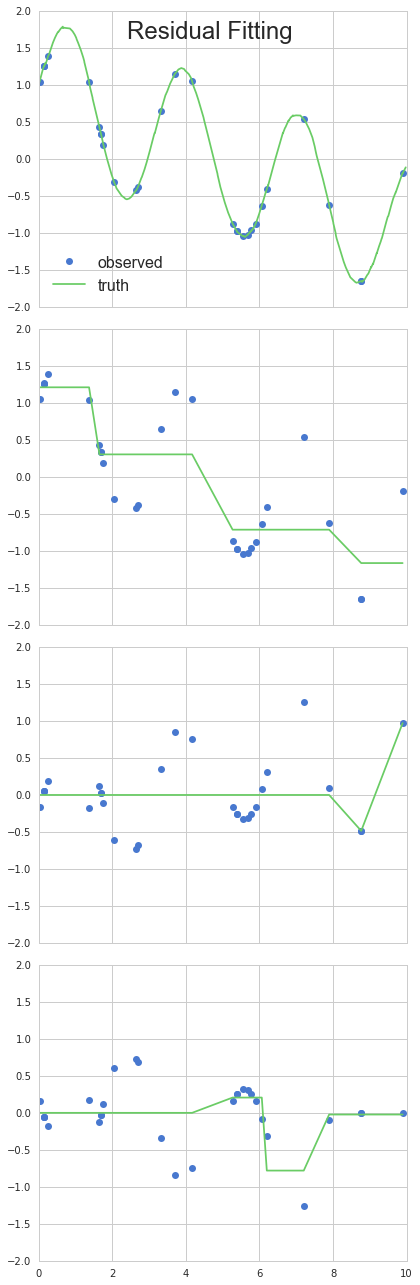

In [189]:
fig, ax = plt.subplots(4, 1, figsize=(6, 18), sharey=True, sharex=True)
ax[0].plot(XX, yy, marker='o', ls='', label='observed')
ax[0].plot(groundX, groundy, label='truth')
ax[0].legend(fontsize=16, loc='lower left');
ax[1].plot(XX, yy, marker='o', ls='')
ax[1].plot(XX, y1)
ax[2].plot(XX, resid1, marker='o', ls='')
ax[2].plot(XX, y2)
ax[3].plot(XX, resid2, marker='o', ls='')
ax[3].plot(XX, y3)
fig.suptitle("Residual Fitting", fontsize=24);
fig.tight_layout()

###Gradient Boosting

In [190]:
from sklearn.ensemble import GradientBoostingClassifier

In [193]:
gbt = GradientBoostingClassifier(max_depth=5, n_estimators=1000)
gbt.fit(X_train, y)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [ ]:
metrics.mean_absolute_error(y_test, gbt.predict(X_test))

In [ ]:
gbt = GradientBoostingClassifier(max_depth=8, n_estimators=1000, subsample=.5, 
                                     random_state=0, learning_rate=.001)
gbt.fit(X_train, y)

In [ ]:
metrics.mean_absolute_error(y_test, gbt.predict(X_test))

##CLEAR UP SCRIPTS

In [4]:
from IPython.display import clear_output

for i in range(20):
    clear_output()